# 4 Perceptron
In this notebook we will want to look at the perceptron. What you have done manually in the previous task, we will now implement with Python and Numpy. Instead of choosing the weights by deliberation, first we will use the perceptron algorithm to learn the weights and later the backpropagation algorithm.

In [48]:
import numpy as np
import matplotlib.pyplot as plt

## 4.0 Recap
We need to implement three major parts for our objective: a data set, the foward pass and the backward pass.

Remember that our perceptron has two inputs, a bias and three learnable weights.

![Perceptron](./fig/PerceptronG.jpg)

## 4.1 The Data
Our aim is to learn the boolean function AND ($\land$). For that purpose we can create our own data with the corresponding target/labels. We will use 0 for False and 1 for True.
Also, the variable that holds the data will be denominated with _x_ and the variable holding the labels will be _t_.


### Task 4.1.1 Create the data
We will need a dataset that holds all possible inputs for the Boolean function AND. Here is a quick reminder on how that function works:

| A| B | A AND B  |
| :--- | :--- | --- |
| True | True | True |
| True | False | False |
| False | True | False |
| False | False | False |

Our dataset needs to contain all four possible combinations of True and False. As we have a bias, we can treat it just like an input neuron with a fixed input of True.

The labels should contain the teaching signal or ground truth for each dataset sample (as a vector), i.e. the correct output of the corresponding input.

Both, input data and labels, should be represented as Numpy Matrices/Vectors.

In [49]:
x = np.array([[1,1,1], [1,1,0], [1,0,1], [1,0,0]])

In [50]:
t = np.array([1,0,0,0])

## 4.2 The Forward Pass
Now we have to setup all necessary functions to complete a first forward pass through our perceptron and obtain a prediction based on the input.
We need to be able to calculate the inner activation of the neuron _h_, define the activation function _g_, and finally calculate the outer activation _y_.

### Task 4.2.1 Inner activation _h_
From the lecture we now that the inner activation _h_ is just a weighted sum of the inputs.

$$  \large h_i = \sum_{j=1}^{n} w_{ij} x_j $$

Complete the function `inner_activation(...)`. As inputs it should take the input activations and the synaptic weights and return inner activation _h_.

In [51]:
def inner_activation(inputs, weights):
    h = 0
    if inputs.size != len(weights):
        print("Not equal number of inputs and weights")
    
    for i in range(inputs.size):
        h = h + (inputs[i] * weights[i])
    
    return h

### Task 4.2.2 The activation function _g_
The perceptron algorithm uses a step function as its activation function (sometimes also refered to as Heaviside function), to transfer the inner activation _h_ to the outer activation _y_. It looks as follows:

$$    y_i = 
    \begin{cases}
      1 & \text{if } h_i \geq \theta \\
      0 & \text{otherwise}
    \end{cases} $$
    
As the threshold, we define $\theta$ to be 0.

Complete the function `g(...)`. It should take the inner activation _h_ as an input and return the outer activation _y_.

In [52]:
def g(inner_act):
    return 1 if inner_act >= 0 else 0

### Task 4.2.3 Plot the activation function
In order to check if we have done it correctly, we can plot the activation function.
Create artificial datapoints in the range of -1 to 1, feed them into the activation function and plot the outputs.

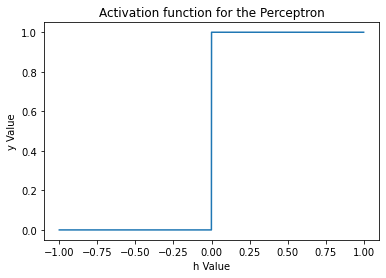

In [53]:
data_points = np.arange(-1, 1, 0.001)
activated_data = []
for data_point in data_points:
    activated_data.append(g(data_point))
    
plt.plot(data_points, activated_data)
plt.xlabel("h Value")
plt.ylabel("y Value")
plt.title("Activation function for the Perceptron")
plt.show()

### Task 4.2.4 Putting it together
Now we can combine our functions to compute the whole forward pass of the perceptron.

Compete the function `forward_pass(...)`, which takes the input activations and the weights as inputs and returns the outer activation _y_.

In [54]:
def forward_pass(inputs, weights):
    """
    preds = []
    for each input in inputs:
        do 
            preds += g(inner_act)
    :param inputs:
    :param weights:
    """
    activations = []
    for input_val in inputs:
        activations.append(g(inner_activation(input_val, weights)))
    return activations

## 4.3 The Backward Pass
The backward pass changes the weights in respect to the error.

From the lecture we now that the update rule of the perceptron algorithm looks like this:

$$ \large \Delta w_{ij} = \eta (t_i - y_i) x_j $$
$$ \large w_{ij} \leftarrow w_{ij} + \Delta w_{ij} $$

$\eta$ is a hyperparameter that needs to be set. In our case, 0.01 is a reasonable value.

### Task 4.3.1 Update the weights
Complete the function `update(...)` which takes as input the current weights, the label, the input activation and the outer activation and returns the updated weights.

In [55]:
def update(curr_weights, label, inputs, outer_act):
    """
    x = inputs
    y = outer_act
    t = label
    lern_rate * (t - y) * x
    
    :param curr_weights: The current weights as an array
    :param label: The target value
    :param inputs: The input values
    :param outer_act: The outer activation
    """
    lern_rate = 0.01
    for i in range(len(curr_weights)):
        # For each input value -> Calculate difference between target_value and actual_value, multiply input and lern rate -> get weight diff
        delta_weight = lern_rate * (label - outer_act) * inputs[i]
        curr_weights[i] = curr_weights[i] + delta_weight
        
    return curr_weights
        

## 4.4 Learning the boolean function
Now we can use all the functions we have written, to piece together the perceptron algorithm and learn the AND function. Before we start, we need to set a start point in the weight space. For that purpose we define the weights more or less randomly before the learning starts.

In [56]:
w = np.array([3.0,-3.0,-2.0])

### Task 4.4.1 The training loop
In neural network training, you will often encouter a central training loop that iterates through the dataset and updates the weights regularly according to the generated predictions.
Your task now is to write this training loop.

For one epoch, step through all datapoints:
  - compute the outer activation for the datapoint
  - update the weights accordingly.
  
Do this for 1000 epochs.
Every 50 epochs, print the current weights.

[ 2.98 -3.   -2.  ]
[ 2.47 -2.51 -2.  ]
[ 1.97 -2.01 -2.  ]
[ 1.64 -1.67 -1.67]
[ 1.31 -1.34 -1.33]
[ 0.98 -1.   -1.  ]
[ 0.64 -0.67 -0.67]
[ 0.31 -0.34 -0.33]
[-1.00000000e-02 -1.00000000e-02  1.64104841e-15]
[-0.03  0.01  0.02]
[-0.03  0.01  0.02]
[-0.03  0.01  0.02]
[-0.03  0.01  0.02]
[-0.03  0.01  0.02]
[-0.03  0.01  0.02]
[-0.03  0.01  0.02]
[-0.03  0.01  0.02]
[-0.03  0.01  0.02]
[-0.03  0.01  0.02]
[-0.03  0.01  0.02]


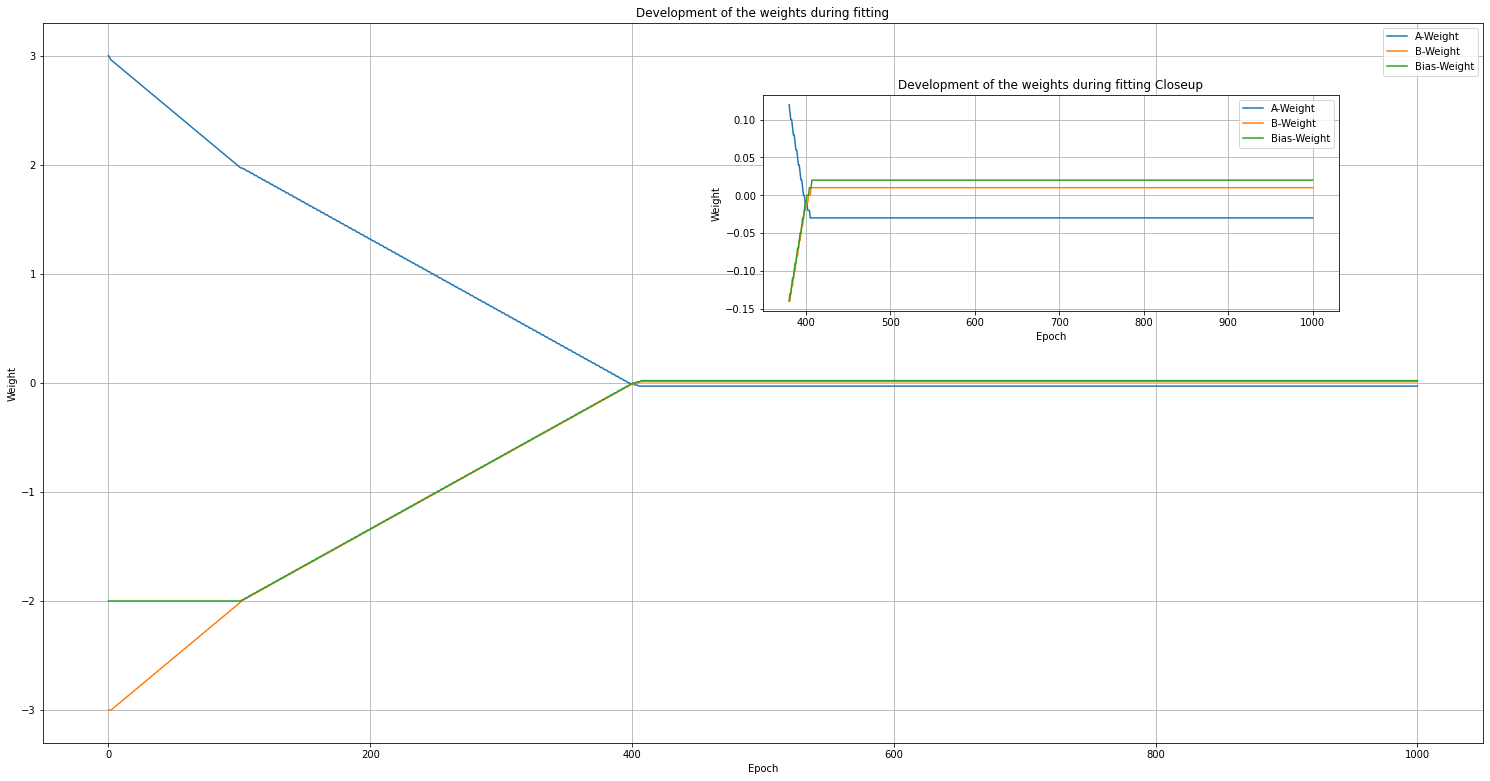

In [57]:
"""
x = data_point with inputs
w = weights
t = labels for data_points

-> for data_point, label in x, t:
"""
epochs = 1000
weights = w.copy()
weight_history = [weights.copy()]

if len(x) != len(t):
    print("Uneven number of datapoints and labels")

for i in range(epochs):
    # Diese Schleife in forward pass?
    for j in range(len(x)):
        outer_act = forward_pass(x, weights)
        weights = update(weights, t[j], x[j], outer_act[j])
        
    weight_history.append(weights.copy())
        
    if i % 50 == 0:
        print(weights)
        
fig = plt.figure(figsize=[20, 10])

ax1 = fig.add_axes([0, 0, 1, 1])
ax1.plot(weight_history, label=["A-Weight", "B-Weight", "Bias-Weight"])
ax1.legend()
ax1.grid(True)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Weight")
ax1.set_title("Development of the weights during fitting")

ax2 = fig.add_axes([0.5, 0.6, .4, .3])
ax2.plot(np.arange(380, 1001, 1), weight_history[380:], label=["A-Weight", "B-Weight", "Bias-Weight"])
ax2.legend()
ax2.grid(True)
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Weight")
ax2.set_title("Development of the weights during fitting Closeup")

plt.show()

As you might have realised, the weights do not change anymore after a certain point. The perceptron algorithm has converged.
We now have a set of weights, that we can use for predicting Boolean values. But before we deploy our model, we need to evaluate its quality. Has it really learned the function properly?

### Task 4.4.2 The error _E(w)_
In order to evaluate how good our current set of weights _w_ is, we can compute the error.

$$ \large E(w) = \frac{1}{2} \sum_i (t_i - y_i)^2 $$

Implement the function `error(...)` which takes predcitions (outer activations) and (labels) as input and returns the error.

Afterwards, compute the prediction error for the whole dataset. If it is zero, your model predicts perfectly.

In [58]:
def error(predictions, labels):
    if len(predictions) != len(labels):
        print("Not equal number of predictions and actual values (labels)")
    
    sum_error = 0
    for i in range(len(labels)):
        sum_error = sum_error + (labels[i] - predictions[i]) ** 2
        
    return (0.5 * sum_error)

In [59]:
# getting the prediction error for the whole dataset
# TODO this right? added for loop
preds = forward_pass(x, weights)
print(error(t,preds))

0.0


## 4.5 Deploy the model
Now that we have a perfectly working and evaluated model, the most interesting part for the machine learning researcher is done. However, the end user, who might not be as familiar with neural networks as we are, might have trouble applying the model to new, unseen data.

### Task 4.5.1 The AND function
We want to write a function that does not require the user to know about inner and outer activations or transfer functions but still enable them to harness the power of our model.


Complete the function `AND(...)` that takes as input too boolean values A and B and returns the prediction of our perceptron model.


In [86]:
def AND(a, b):
    bias = 1
    data_point = np.array([[bias, a, b]])
    return forward_pass(data_point, weights)


def AND2(inputs):
    bias = 1
    results = []
    for i in range(len(inputs)):
        data_point = np.array([[bias, inputs[i][0], inputs[i][1]]])
        results.append(forward_pass(data_point, weights))
        
    return results


print(AND2([[1, 1], [1, 0]]))
print(AND(1, 0))
print(AND(0, 1))
print(AND(0, 0))

[[1], [0]]
[0]
[0]
[0]
